# Titanic Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we will be analyzing data associated with the tragic event of the sinking Titanic and in particular we will be interested in finding trends among the passengers who survived and how they differ from the passengers who did not survive. 

The titanic data frame describes the survival status of individual passengers on the Titanic. The titanic data frame does not contain information for the crew, but it does contain actual and estimated ages for almost 80% of the passengers.

**Variable Descriptions :** 

*Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

*survival Survival (0 = No; 1 = Yes)

*name Name

*sex Sex

*age Age

*sibsp Number of Siblings/Spouses Aboard

*parch Number of Parents/Children Aboard

*ticket Ticket Number

*fare Passenger Fare (British pound)

*cabin Cabin

*embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

*boat Lifeboat

*body Body Identification Number

*home.dest Home/Destination

### Question(s) for Analysis

In this project we will be analyzing data associated with the tragic event of the sinking Titanic and we will be interested in finding trends among the passengers.

To say in more detail we will be analyzing who survived and how they differ from the passengers who did not survive.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [ ]:
df=pd.read_csv(r'titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning 

In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


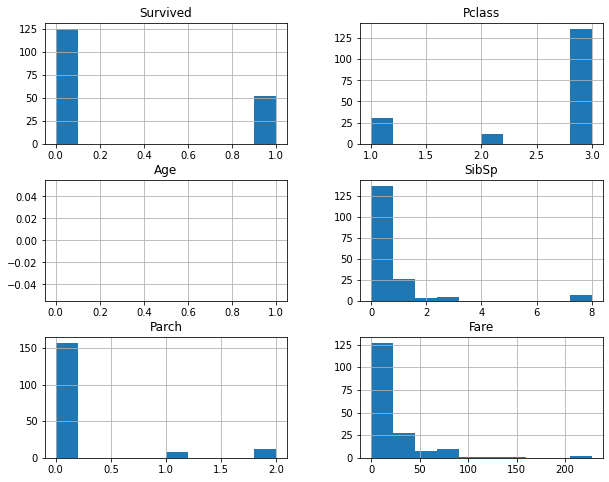

In [ ]:
df[df.Age.isnull()].hist(figsize=(10,8));

In [ ]:
df.fillna(df.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis

Q1-Whether The Fare Is Associated With Survival

In [ ]:
survived=df.Survived==True
died=df.Survived==False

In [ ]:
df.Fare[survived].mean() #We see that significant higher fare in here than the fare of died people. 

48.20949823529412

In [ ]:
df.Fare[died].mean()

22.117886885245902

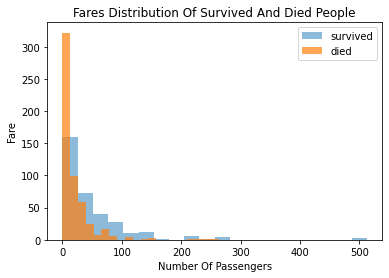

In [ ]:
%matplotlib inline
df.Fare[survived].hist(alpha=0.5,bins=20,label='survived')
df.Fare[died].hist(alpha=0.7,bins=20,label='died')

plt.title('Fares Distribution Of Survived And Died People')
plt.xlabel('Number Of Passengers')
plt.ylabel('Fare')
plt.legend(loc='best')
plt.grid(False)
plt.show()

Q2-The Association Between Passenger Class And Fare 

In [ ]:
df.groupby('Pclass').Survived.mean() #We see that high class is more likely to survive. 

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

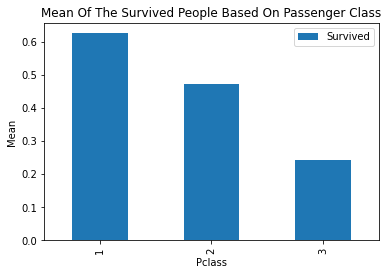

In [ ]:
df.groupby('Pclass').Survived.mean().plot(kind='bar')
plt.title('Mean Of The Survived People Based On Passenger Class')
plt.ylabel('Mean')
plt.legend()

Q3-The Association Between Ages and People Survived & Died

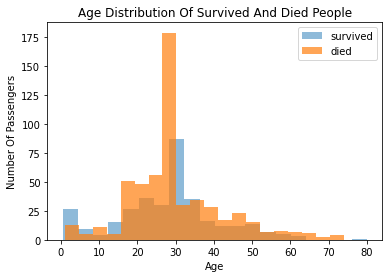

In [ ]:
%matplotlib inline
df.Age[survived].hist(alpha=0.5,bins=20,label='survived')
df.Age[died].hist(alpha=0.7,bins=20,label='died');

plt.title('Age Distribution Of Survived And Died People')
plt.xlabel('Age')
plt.ylabel('Number Of Passengers')
plt.legend(loc='best')
plt.grid(False)
plt.show() #We see in here that really young children have chance of surviving.

Q4-The Association Between Gender and People Survived & Died

In [ ]:
df.groupby('Sex').Survived.mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

Text(0, 0.5, 'Mean')

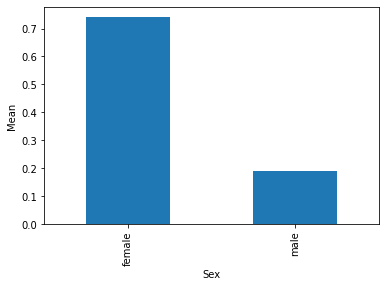

In [ ]:
df.groupby('Sex').Survived.mean().plot(kind='bar')

plt.ylabel('Mean') #We see in here that females are more likely surviving than men. 

In [ ]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [ ]:
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          92
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [ ]:
df.query('Sex=="female"')['Fare'].median(),df.query('Sex=="male"')['Fare'].median()

(23.0, 10.5)

<AxesSubplot:xlabel='Pclass,Sex'>

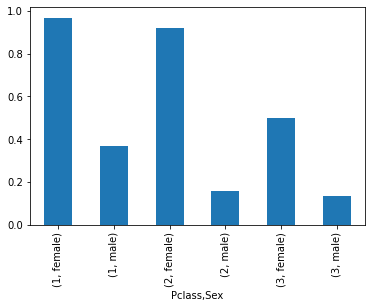

In [ ]:
df.groupby(['Pclass','Sex']).Survived.mean().plot(kind='bar') #We see here that females are more prone to survive. 

Q5-How Having Family On Board Is Associated With Survival

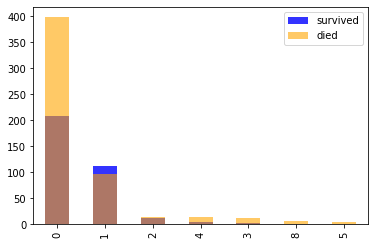

In [ ]:
df.SibSp[survived].value_counts().plot(kind='bar',alpha=0.8,color='blue',label='survived')
df.SibSp[died].value_counts().plot(kind='bar',alpha=0.6,color='orange',label='died')

plt.legend(loc='best')

#A lot of people who have lots of family dont appear to be surviving. 

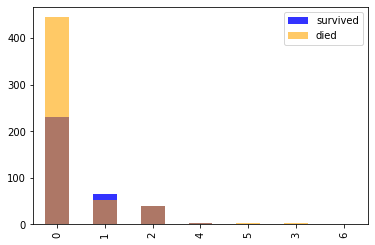

In [ ]:
df.Parch[survived].value_counts().plot(kind='bar',alpha=0.8,color='blue',label='survived')
df.Parch[died].value_counts().plot(kind='bar',alpha=0.6,color='orange',label='died')

plt.legend(loc='best') #We see in here again that people who have big families dont appear to survive. 

Q6-How Embark From Is Associated With Survival

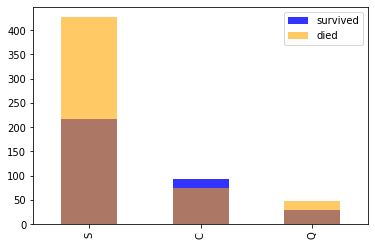

In [ ]:
df.Embarked[survived].value_counts().plot(kind='bar',alpha=0.8,color='blue',label='survived')
df.Embarked[died].value_counts().plot(kind='bar',alpha=0.6,color='orange',label='died')

plt.legend(loc='best') #People in S category are prone to die according to this analysis compared to other categories.

<a id='conclusions'></a>
## Conclusions

Based on our calculations we can infer so many informations. In our analysis at the beginning we see that a significant portion of higher fare than the fare of died people. When we check the association between passenger class and fare we see that high class is more likely to survive.

According to the ages of the dataset, young children have chance of surviving especially around 30 years old and females are more likely surviving than men. 

Plus, when we check the families we see that a lot of people who have big families dont appear to be surviving. 

Lastly when we observe the ports of embarkation, people in S category are prone to die according to this analysis compared to other categories.

## Submitting The Project 

In [ ]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])